In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import subprocess
import matplotlib
import copy
import cv2
# matplotlib.font_manager._rebuild()
# plt.rcParams['font.family'] = 'Times New Roman' #全体のフォントを設定
%matplotlib inline

In [2]:
import sys
sys.path.append("/notebooks/nb_IEEE/opmap/")

In [3]:
import opmap
from opmap.rawCam import RawCam
from opmap.vmemMap import VmemMap
from opmap.apdMap import APDMap
from opmap.phaseMapHilbert import PhaseMapHilbert as PhaseMap
from opmap.phaseVarianceMap import PhaseVarianceMap

In [4]:
def FFT(vmem_1d, N, dt, fc_low=None, fc_high=None):
    fq = np.linspace(0, 1.0/dt, N)
    F = np.fft.fft(vmem_1d)
    if fc_low is not None:
        F[(fq <= fc_low)] = 0
    if fc_high is not None:
        F[(fq >= fc_high)] = 0
    
    F_abs = np.abs(F)
    F_abs_amp = F_abs/N
#     F_abs_amp[0] = F_abs_amp[0]/2
    F_abs_amp[0] = 0
    
    F_ifft = np.fft.ifft(F)
    F_ifft_real = F_ifft.real * 2
    
    return F_ifft_real

In [5]:
def isochronal(pmap, threshold):
    contour = np.zeros_like(pmap.data)

    for i in range(contour.shape[1]):
        for j in range(contour.shape[2]):        
            if pmap.roi[i,j] == 1:
                counter = 0
                for time in range(contour.shape[0]):
                    if time == 0:
                        pass
                    elif ((pmap.data[time-1, i, j] < threshold) * (pmap.data[time, i, j] > threshold)) == 1:
                        counter = 0

                    contour[time, i, j] = counter
                    counter += 1
                
    return contour

In [6]:
def normirize(data):
    return (data-np.min(data))/(np.max(data)-np.min(data))

## 旋回興奮に対する冷却

### 20181121-1/C001H001S0008

In [7]:
! ls /mnt/Omer/Project/

In [8]:
data_name = '20181121-1/C001H001S0008/'
parent_path = '/mnt/Jalife/ExperimentData/'

data_path = os.path.join(parent_path, data_name)
print(data_path)

start = 29000
end = 30000

date = data_path.split('/')[-3]
session_name = data_path.split('/')[-2]
save_parent = os.path.join('/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/', '%s/%s/%s-%s' % (date, session_name, start, end))

raw = RawCam(path=data_path, cam_type='sa4',image_width=256, image_height=256, frame_start=start, frame_end=end)

vmem = VmemMap(raw)

roi_png = cv2.imread('/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/mask/20181121-1_C001H001S0014.png', cv2.IMREAD_GRAYSCALE)
roi_png = roi_png/255.0

vmem.roi = roi_png
vmem.data = vmem.data * vmem.roi

for i in range(vmem.data.shape[1]):
    for j in range(vmem.data.shape[2]):
        vmem.data[:, i, j] = FFT(vmem.data[:, i, j], vmem.data.shape[0], 0.002, fc_low=2, fc_high=50)

vmem.smooth(size=9)

/mnt/Jalife/ExperimentData/20181121-1/C001H001S0008/


AssertionError: 

In [157]:
raw.saveImage(os.path.join(save_parent, "jet/raw"), skip=500)

In [236]:
pmap = PhaseMap(vmem)
pvmap = PhaseVarianceMap(pmap, size=9)

In [281]:
plt.imsave('/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/20181121-1/C001H001S0008/29000-30000/trajectory.png',
           (np.sum((pvmap.data[870:910, :, :] > 0.8), axis=0) > 0) *1, cmap="gray")

In [35]:
vmem.saveImage(os.path.join(save_parent, "jet/vmem"))

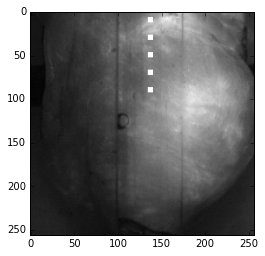

In [172]:
num = 305
#img = cv2.imread('/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/20181121-1/C001H001S0008/29000-30000/jet/vmem/%s.png'%'{0:06d}'.format(num))
img = cv2.imread('/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/20181121-1/C001H001S0008/29000-30000/jet/raw/000001.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
#中心
# img[59:63,39:43] = 0

img[7:13,134:140] = 255
img[27:33,134:140] = 255
img[47:53,134:140] = 255
img[67:73,134:140] = 255
img[87:93,134:140] = 255


# img[22:24,70:72] = 0
# img[41:43,73:75] = 0
# img[52:54,57:59] = 0
# img[44:46,40:42] = 0
# img[25:27,37:39] = 0
# img[14:16,53:55] = 0

#plt.imsave('/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/20181220-1/C001H001S0012/9500-10500/jet/vmem_%s.png'%num, img)

In [ ]:
plt.figure(figsize=(8,6))
plt.subplots_adjust(hspace=0.3) 

plt.subplot(5,1,1)
# plt.plot(normilize(vmem.data[845:915, 156, 108]))
plt.plot(normilize(vmem.data[250:, 156, 108]))
# plt.xlim([0, 70])
plt.xticks([])
plt.yticks([])
# plt.yticks([0, 0.25, 0.5, 0.75, 1.0])

plt.subplot(5,1,2)
# plt.plot(normilize(vmem.data[845:915, 156, 58]))
plt.plot(normilize(vmem.data[250:, 156, 58]))
# plt.xlim([0, 70])
plt.xticks([])
plt.yticks([])
# plt.yticks([0, 0.25, 0.5, 0.75, 1.0])

plt.subplot(5,1,3)
# plt.plot(normilize(vmem.data[845:915, 110, 42]))
plt.plot(normilize(vmem.data[250:, 110, 42]))
# plt.xlim([0, 70])
plt.xticks([])
plt.yticks([])
# plt.yticks([0, 0.25, 0.5, 0.75, 1.0])

plt.subplot(5,1,4)
# plt.plot(normilize(vmem.data[845:915, 80, 82]))
plt.plot(normilize(vmem.data[250:, 80, 82]))
# plt.xlim([0, 70])
plt.xticks([])
plt.yticks([])
# plt.xticks([0, 10, 20, 30, 40, 50, 60], [850, 860, 870, 880, 890, 900, 910])
# plt.yticks([0, 0.25, 0.5, 0.75, 1.0])

plt.subplot(5,1,5)
# plt.plot(normilize(vmem.data[845:915, 108, 122]))
plt.plot(normilize(vmem.data[250:, 108, 122]))
# plt.xlim([0, 70])
plt.xticks([0, 50, 100, 150, 200, 250], [20.5, 20.6, 20.7, 20.8, 20.9, 21.0], size=20)
plt.yticks([])
# plt.yticks([0, 0.25, 0.5, 0.75, 1.0])

plt.savefig('/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/20181220-1/C001H001S0012/9500-10500/jet/vmem_comp.png', dpi=300, transparent=True)
plt.close()

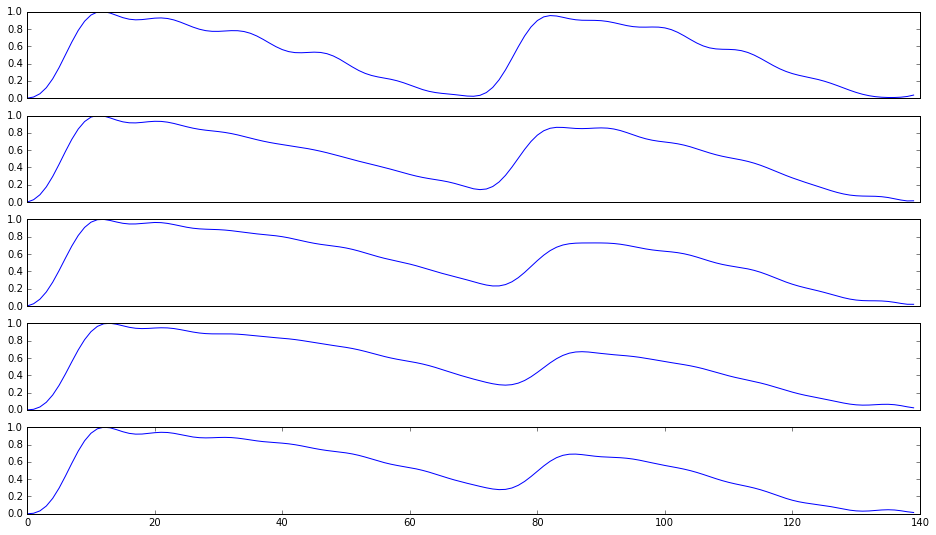

In [165]:
duration = 140

plt.figure(figsize=(16,9))
plt.subplot(5,1,1)
plt.plot(normirize(vmem.data[115:115+duration, 10, 137]))
plt.xticks([])

plt.subplot(5,1,2)
plt.plot(normirize(vmem.data[115:115+duration, 30, 137]))
plt.xticks([])

plt.subplot(5,1,3)
plt.plot(normirize(vmem.data[114:114+duration, 50, 137]))
plt.xticks([])

plt.subplot(5,1,4)
plt.plot(normirize(vmem.data[113:113+duration, 70, 137]))
plt.xticks([])

plt.subplot(5,1,5)
plt.plot(normirize(vmem.data[114:114+duration, 90, 137]))

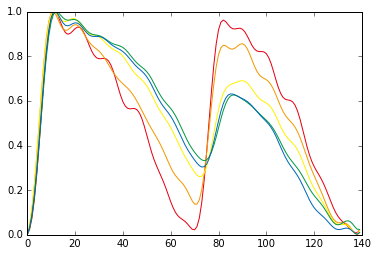

In [166]:
plt.plot(normirize(vmem.data[115:115+duration, 10, 128]), color="#E60012")
plt.plot(normirize(vmem.data[115:115+duration, 30, 128]), color="#F39800")
plt.plot(normirize(vmem.data[114:114+duration, 50, 128]), color="#FFF100")
plt.plot(normirize(vmem.data[113:113+duration, 70, 128]), color="#009944")
plt.plot(normirize(vmem.data[114:114+duration, 90, 128]), color="#0068B7")

In [235]:
APD50 = np.zeros((256,256))

for i in range(256):
    for j in range(256):
        
        flag = 0
        start = 0
        end = 0
        
        if vmem.roi[i,j] == 0:
            pass
        else:
            for t in range(100):
                if flag == 0 and normirize(vmem.data[100:200,i,j])[t] > 0.5 and start == 0:
                    flag = 1
                    start = t
                if flag == 1 and normirize(vmem.data[100:200,i,j])[t] > 0.7:
                    flag = 2
                if flag == 2 and normirize(vmem.data[100:200,i,j])[t] < 0.5 and end == 0:
                    flag = 3
                    end = t
            APD50[i,j] = (end-start)*2

In [226]:
plt.imshow(APD50, vmin=40, vmax=140, cmap='viridis')
plt.xticks([])
plt.yticks([])
plt.colorbar()
plt.savefig("/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/APD50/20181121-1_C001H001S0008.png")
plt.close()

In [228]:
plt.imsave("/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/APD50/20181121-1_C001H001S0008_wocolorbar.png", APD50, cmap="viridis", vmin=40, vmax=140)

### 20181121-1/C001H001S0017

In [229]:
data_name = '20181121-1/C001H001S0017/'
parent_path = '/mnt/Jalife/ExperimentData/'

data_path = os.path.join(parent_path, data_name)
print(data_path)

start = 21500
end = 22500

date = data_path.split('/')[-3]
session_name = data_path.split('/')[-2]
save_parent = os.path.join('/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/', '%s/%s/%s-%s' % (date, session_name, start, end))

raw = RawCam(path=data_path, cam_type='sa4',
          image_width=256, image_height=256, frame_start=start, frame_end=end)

vmem = VmemMap(raw)

roi_png = cv2.imread('/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/mask/20181121-1_C001H001S0017.png', cv2.IMREAD_GRAYSCALE)
roi_png = roi_png/255.0

vmem.roi = roi_png
vmem.data = vmem.data * vmem.roi

for i in range(vmem.data.shape[1]):
    for j in range(vmem.data.shape[2]):
        vmem.data[:, i, j] = FFT(vmem.data[:, i, j], vmem.data.shape[0], 0.002, fc_low=2, fc_high=50)

vmem.smooth(size=9)

/mnt/Jalife/ExperimentData/20181121-1/C001H001S0017/


In [130]:
raw.saveImage(os.path.join(save_parent, "jet/raw"), skip=500)

In [116]:
vmem.saveImage(os.path.join(save_parent, "jet/vmem"))

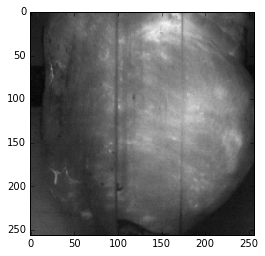

In [169]:
num = 350
#img = cv2.imread('/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/20181121-1/C001H001S0017/21500-22500/jet/vmem/%s.png'%'{0:06d}'.format(num))
img = cv2.imread('/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/20181121-1/C001H001S0017/21500-22500/jet/raw/000001.png')

#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
#中心
# img[59:63,39:43] = 0

#img[7:13,134:140] = 255
#img[27:33,134:140] = 255
#img[47:53,134:140] = 255
#img[67:73,134:140] = 255
#img[87:93,134:140] = 255

# img[22:24,70:72] = 0
# img[41:43,73:75] = 0
# img[52:54,57:59] = 0
# img[44:46,40:42] = 0
# img[25:27,37:39] = 0
# img[14:16,53:55] = 0

#plt.imsave('/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/20181220-1/C001H001S0012/9500-10500/jet/vmem_%s.png'%num, img)

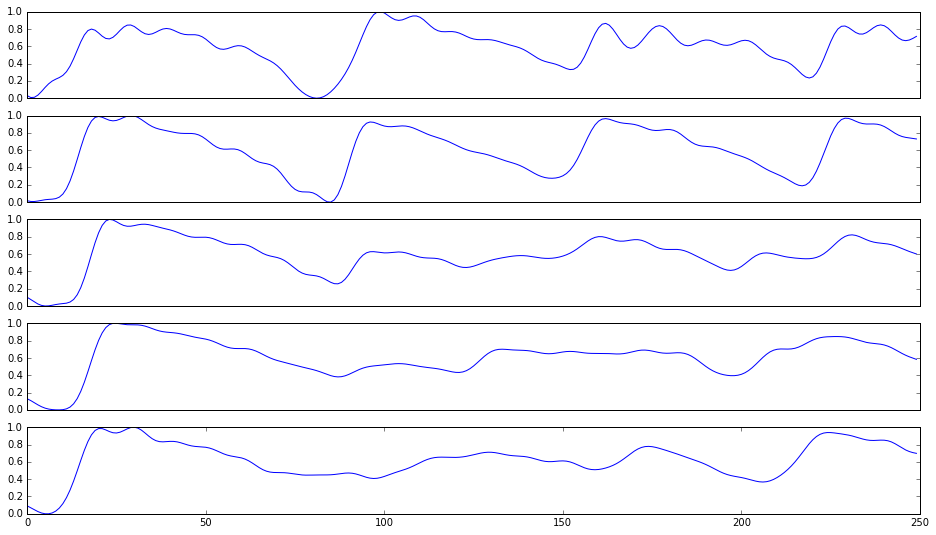

In [129]:
duration = 140

plt.figure(figsize=(16,9))
plt.subplot(5,1,1)
plt.plot(normirize(vmem.data[115:115+duration, 10, 128]))
plt.xticks([])

plt.subplot(5,1,2)
plt.plot(normirize(vmem.data[115:115+duration, 30, 128]))
plt.xticks([])

plt.subplot(5,1,3)
plt.plot(normirize(vmem.data[114:114+duration, 50, 128]))
plt.xticks([])

plt.subplot(5,1,4)
plt.plot(normirize(vmem.data[113:113+duration, 70, 128]))
plt.xticks([])

plt.subplot(5,1,5)
plt.plot(normirize(vmem.data[114:114+duration, 90, 128]))

In [230]:
APD50 = np.zeros((256,256))

for i in range(256):
    for j in range(256):
        
        flag = 0
        start = 0
        end = 0
        
        if vmem.roi[i,j] == 0:
            pass
        else:
            for t in range(100):
                if flag == 0 and normirize(vmem.data[120:220,i,j])[t] > 0.5 and start == 0:
                    flag = 1
                    start = t
                if flag == 1 and normirize(vmem.data[120:220,i,j])[t] > 0.7:
                    flag = 2
                if flag == 2 and normirize(vmem.data[120:220,i,j])[t] < 0.5 and end == 0:
                    flag = 3
                    end = t
            APD50[i,j] = (end-start)*2

In [231]:
plt.imshow(APD50, vmin=40, vmax=140, cmap="viridis")
plt.xticks([])
plt.yticks([])
plt.colorbar()
plt.savefig("/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/APD50/20181121-1_C001H001S0017.png")
plt.close()

In [232]:
plt.imsave("/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/APD50/20181121-1_C001H001S0017_wocolorbar.png", APD50, cmap="viridis", vmin=40, vmax=140)

## batch phase variance analysis

In [51]:
analysis_path = ["/mnt/Jalife/ExperimentData/20181121-1/C001H001S0008/",
                 "/mnt/Jalife/ExperimentData/20181121-1/C001H001S0014/",
                 "/mnt/Jalife/ExperimentData/20181121-1/C001H001S0017/",
                 "/mnt/Jalife/ExperimentData/20181121-1/C001H001S0021/",
                 "/mnt/Jalife/ExperimentData/20181218-1/C001H001S0007/",
                 "/mnt/Jalife/ExperimentData/20181218-1/C001H001S0008/",
                 "/mnt/Jalife/ExperimentData/20181218-1/C001H001S0009/",
                 "/mnt/Jalife/ExperimentData/20181218-1/C001H001S0011/",
                 "/mnt/Jalife/ExperimentData/20181218-1/C001H001S0017/",
                 "/mnt/Jalife/ExperimentData/20181218-1/C001H001S0018/",
                 "/mnt/Jalife/ExperimentData/20181218-1/C001H001S0020/",
                 "/mnt/Jalife/ExperimentData/20181218-1/C001H001S0022/",
                 "/mnt/Jalife/ExperimentData/20181218-1/C001H001S0024/",
                 "/mnt/Jalife/ExperimentData/20181218-1/C001H001S0026/",
                 "/mnt/Jalife/ExperimentData/20181218-1/C001H001S0028/",
                 "/mnt/Jalife/ExperimentData/20181220-1/C001H001S0007/",
                 "/mnt/Jalife/ExperimentData/20181220-1/C001H001S0009/",
                 "/mnt/Jalife/ExperimentData/20181220-1/C001H001S0010/",
                 "/mnt/Jalife/ExperimentData/20181220-1/C001H001S0012/",
                 "/mnt/Jalife/ExperimentData/20181220-1/C001H001S0014/",
                 "/mnt/Jalife/ExperimentData/20181220-1/C001H001S0015/",
                 "/mnt/Jalife/ExperimentData/20181220-1/C001H001S0018/",
                 "/mnt/Jalife/ExperimentData/20181220-1/C001H001S0020/",
                 "/mnt/Jalife/ExperimentData/20181220-1/C001H001S0022/"
                ]

In [62]:
for analysis in analysis_path:
    #print(analysis)
    
    start = 0
    end = 10
    
    date = analysis.split('/')[-3]
    session_name = analysis.split('/')[-2]
    print(date, session_name)
    
    save_name = os.path.join('/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/raw', '%s_%s.png' % (date, session_name))
    
    raw = RawCam(path=analysis, cam_type='sa4',
          image_width=256, image_height=256, frame_start=start, frame_end=end)
    
    plt.imsave(save_name, raw.data[5]/np.max(raw.data[5]), vmin=0, vmax=1, cmap='gray')
    plt.close()

20181121-1 C001H001S0008
20181121-1 C001H001S0014
20181121-1 C001H001S0017
20181121-1 C001H001S0021
20181218-1 C001H001S0007
20181218-1 C001H001S0008
20181218-1 C001H001S0009
20181218-1 C001H001S0011
20181218-1 C001H001S0017
20181218-1 C001H001S0018
20181218-1 C001H001S0020
20181218-1 C001H001S0022
20181218-1 C001H001S0024
20181218-1 C001H001S0026
20181218-1 C001H001S0028
20181220-1 C001H001S0007
20181220-1 C001H001S0009
20181220-1 C001H001S0010
20181220-1 C001H001S0012
20181220-1 C001H001S0014
20181220-1 C001H001S0015
20181220-1 C001H001S0018
20181220-1 C001H001S0020
20181220-1 C001H001S0022


In [63]:
analysis_path = [["/mnt/Jalife/ExperimentData/20181121-1/C001H001S0008/", 29000, 30000,
                  "/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/mask/20181121-1_C001H001S0014.png"],
                 ["/mnt/Jalife/ExperimentData/20181121-1/C001H001S0014/", 29000, 30000,
                  "/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/mask/20181121-1_C001H001S0014.png"],
                 ["/mnt/Jalife/ExperimentData/20181121-1/C001H001S0017/", 21500, 22500,
                  "/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/mask/20181121-1_C001H001S0017.png"],
                 ["/mnt/Jalife/ExperimentData/20181121-1/C001H001S0021/", 29000, 30000,
                  "/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/mask/20181121-1_C001H001S0017.png"],
                 ["/mnt/Jalife/ExperimentData/20181218-1/C001H001S0007/", 29000, 30000,
                  "/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/mask/20181218-1_C001H001S0007.png"],
                 ["/mnt/Jalife/ExperimentData/20181218-1/C001H001S0008/", 29000, 30000,
                  "/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/mask/20181218-1_C001H001S0007.png"],
                 ["/mnt/Jalife/ExperimentData/20181218-1/C001H001S0009/", 29000, 30000,
                  "/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/mask/20181218-1_C001H001S0009.png"],
                 ["/mnt/Jalife/ExperimentData/20181218-1/C001H001S0011/", 29000, 30000,
                  "/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/mask/20181218-1_C001H001S0009.png"],
                 ["/mnt/Jalife/ExperimentData/20181218-1/C001H001S0017/", 29000, 30000,
                  "/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/mask/20181218-1_C001H001S0009.png"],
                 ["/mnt/Jalife/ExperimentData/20181218-1/C001H001S0018/", 24200, 25200,
                  "/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/mask/20181218-1_C001H001S0018.png"],
                 ["/mnt/Jalife/ExperimentData/20181218-1/C001H001S0020/", 6700, 7700,
                  "/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/mask/20181218-1_C001H001S0018.png"],
                 ["/mnt/Jalife/ExperimentData/20181218-1/C001H001S0022/", 25700, 26700,
                  "/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/mask/20181218-1_C001H001S0018.png"],
                 ["/mnt/Jalife/ExperimentData/20181218-1/C001H001S0024/", 29000, 30000,
                  "/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/mask/20181218-1_C001H001S0018.png"],
                 ["/mnt/Jalife/ExperimentData/20181218-1/C001H001S0026/", 29500, 30500,
                  "/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/mask/20181218-1_C001H001S0018.png"],
                 ["/mnt/Jalife/ExperimentData/20181218-1/C001H001S0028/", 21000, 22000,
                  "/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/mask/20181218-1_C001H001S0018.png"],
                 ["/mnt/Jalife/ExperimentData/20181220-1/C001H001S0007/", 29000, 30000,
                  "/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/mask/20181220-1_C001H001S0007.png"],
                 ["/mnt/Jalife/ExperimentData/20181220-1/C001H001S0009/", 29000, 30000,
                  "/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/mask/20181220-1_C001H001S0007.png"],
                 ["/mnt/Jalife/ExperimentData/20181220-1/C001H001S0010/", 29000, 30000,
                  "/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/mask/20181220-1_C001H001S0012.png"],
                 ["/mnt/Jalife/ExperimentData/20181220-1/C001H001S0012/", 9500, 10500,
                  "/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/mask/20181220-1_C001H001S0012.png"],
                 ["/mnt/Jalife/ExperimentData/20181220-1/C001H001S0014/", 29000, 30000,
                  "/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/mask/20181220-1_C001H001S0012.png"],
                 ["/mnt/Jalife/ExperimentData/20181220-1/C001H001S0015/", 29000, 30000,
                  "/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/mask/20181220-1_C001H001S0020.png"],
                 ["/mnt/Jalife/ExperimentData/20181220-1/C001H001S0018/", 10000, 11000,
                  "/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/mask/20181220-1_C001H001S0020.png"],
                 ["/mnt/Jalife/ExperimentData/20181220-1/C001H001S0020/", 7300, 8300,
                  "/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/mask/20181220-1_C001H001S0020.png"],
                 ["/mnt/Jalife/ExperimentData/20181220-1/C001H001S0022/", 29000, 30000,
                  "/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/mask/20181220-1_C001H001S0020.png"]
                ]

In [89]:
for analysis in analysis_path:
    
    data_path = analysis[0]
    start = analysis[1]
    end = analysis[2]
    mask_dir = analysis[3]
    
    date = data_path.split('/')[-3]
    session_name = data_path.split('/')[-2]
    
    print(data_path, start, end)
    print(date, session_name)
    
    raw = RawCam(path=data_path, cam_type='sa4',
          image_width=256, image_height=256, frame_start=start, frame_end=end)
    
    vmem = VmemMap(raw)
    
    roi_png = cv2.imread(mask_dir, cv2.IMREAD_GRAYSCALE)
    roi_png = roi_png/255.0

    vmem.roi = roi_png
    vmem.data = vmem.data * vmem.roi
    
    for i in range(vmem.data.shape[1]):
        for j in range(vmem.data.shape[2]):
            vmem.data[:, i, j] = FFT(vmem.data[:, i, j], vmem.data.shape[0], 0.002, fc_low=2, fc_high=50)

    vmem.smooth(size=9)
    
    pmap = PhaseMap(vmem)
    pvmap = PhaseVarianceMap(pmap, size=9)
    
    PS = (pvmap.data > 0.8)*1

    plt.imsave(os.path.join("/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/PS_trajectory/", "%s_%s.png" % (date, session_name)),
              np.sum(PS, axis=0), cmap="viridis")
    plt.close()

/mnt/Jalife/ExperimentData/20181121-1/C001H001S0008/ 29000 30000
20181121-1 C001H001S0008
/mnt/Jalife/ExperimentData/20181121-1/C001H001S0014/ 29000 30000
20181121-1 C001H001S0014
/mnt/Jalife/ExperimentData/20181121-1/C001H001S0017/ 21500 22500
20181121-1 C001H001S0017
/mnt/Jalife/ExperimentData/20181121-1/C001H001S0021/ 29000 30000
20181121-1 C001H001S0021
/mnt/Jalife/ExperimentData/20181218-1/C001H001S0007/ 29000 30000
20181218-1 C001H001S0007
/mnt/Jalife/ExperimentData/20181218-1/C001H001S0008/ 29000 30000
20181218-1 C001H001S0008
/mnt/Jalife/ExperimentData/20181218-1/C001H001S0009/ 29000 30000
20181218-1 C001H001S0009
/mnt/Jalife/ExperimentData/20181218-1/C001H001S0011/ 29000 30000
20181218-1 C001H001S0011
/mnt/Jalife/ExperimentData/20181218-1/C001H001S0017/ 29000 30000
20181218-1 C001H001S0017
/mnt/Jalife/ExperimentData/20181218-1/C001H001S0018/ 24200 25200
20181218-1 C001H001S0018
/mnt/Jalife/ExperimentData/20181218-1/C001H001S0020/ 6700 7700
20181218-1 C001H001S0020
/mnt/Jalife/

In [90]:
analysis = ["/mnt/Jalife/ExperimentData/20181121-1/C001H001S0017/", 21500, 22500,
            "/mnt/Omer/Project/03.LinearRegionalCooling/AnalysisResult/Experiment/IEEE/mask/20181121-1_C001H001S0017.png"]